# Prerequisite
* Load required packages and load images (already uploaded on Blackboard) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY numpy and tensorflow/pytorch functions for any type of operations**  

* **Do not use any built-in opencv or anyother such function**


In [58]:
import tensorflow as tf
import numpy as np
from scipy import ndimage as nd
from scipy import interpolate as inter
from matplotlib import pyplot as plt
import imageio.v2 as imageio

#a)Load 'barbara.jpg'


Original Data_type is uint8
Data_type is float32
Image Size is (510, 510)
Image min and max are (0.0, 255.0)


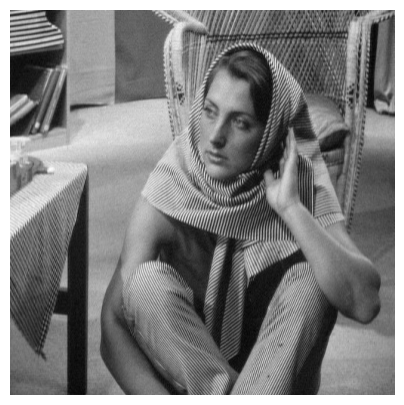

In [59]:
img_path = '/content/barbara.jpg'
img_a0 = imageio.imread(img_path)
# img_a0 = tf.convert_to_tensor(img_a0, dtype=tf.float32)
# img_a = tf.image.rgb_to_grayscale(img_a0)
img_a = img_a0.astype(np.float32)
print('Original Data_type is {}'.format(img_a0.dtype))
print('Data_type is', img_a.dtype)
print('Image Size is {}'.format(img_a.shape))
print('Image min and max are ({}, {})'.format(img_a.min(),img_a.max()))
#################################################
plt.figure(figsize=(5,5))
plt.imshow(img_a, cmap='gray')
plt.axis('off')
plt.show()

#b) Apply DFT to a)

In [60]:
img_b = np.fft.fft2(img_a)
#################################################
print('FFT Data_type is {}'.format(img_b.dtype))
print('FFT Size is {}'.format(img_b.shape))
print('FFT min and max are ({}, {})'.format(img_b.min(),img_b.max()))
#################################################

FFT Data_type is complex128
FFT Size is (510, 510)
FFT min and max are ((-1773421.0325817068+1478407.0709085541j), (29760477+0j))


In [61]:
#a = -1449185.750472431+241803.37904497175j
#b = np.abs(a)
#print(a)
#print(b)
img_b_mod = np.abs(img_b)
#################################################
print('mod-FFT Data_type is {}'.format(img_b_mod.dtype))
print('mod-FFT Size is {}'.format(img_b_mod.shape))
print('mod-FFT min and max are ({}, {})'.\
      format(img_b_mod.min(),img_b_mod.max()))
print('log mod-FFT min and max are ({}, {})'.\
      format(np.log2(1+img_b_mod.min()),np.log2(1+img_b_mod.max()) ))
#################################################

mod-FFT Data_type is float64
mod-FFT Size is (510, 510)
mod-FFT min and max are (0.7225274270445031, 29760477.0)
log mod-FFT min and max are (0.7845269545092883, 24.826894362790927)


#c) Apply log to FFT

In [62]:
min_lb = np.log2(1+img_b_mod.min())
max_lb = np.log2(1+img_b_mod.max())

img_b_lm = np.log2(1+img_b_mod)
img_c = (img_b_lm-min_lb) / (max_lb - min_lb)
img_c = 255.0*img_c
#################################################
print('lm-FFT Data_type is {}'.format(img_c.dtype))
print('mod-FFT Size is {}'.format(img_c.shape))
print('mod-FFT min and max are ({}, {})'.format(img_c.min(),img_c.max()))
#################################################

lm-FFT Data_type is float64
mod-FFT Size is (510, 510)
mod-FFT min and max are (0.0, 255.0)


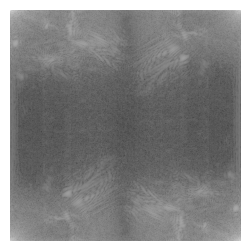

In [63]:
plt.figure(figsize=(3,3))
plt.imshow(img_c, cmap='gray')
plt.axis('off')
plt.show()

#d) Apply fft-shift to image a) and then apply fft

In [64]:
img_fft_a = np.fft.fft2(img_a)
img_d = np.fft.fftshift(img_fft_a)
#################################################
print('shift-FFT Data_type is {}'.format(img_d.dtype))
print('shift-FFT Size is {}'.format(img_d.shape))
print('shift-FFT min and max are ({}, {})'.format(img_d.min(),img_d.max()))
#################################################

shift-FFT Data_type is complex128
shift-FFT Size is (510, 510)
shift-FFT min and max are ((-1773421.0325817068+1478407.0709085541j), (29760477+0j))


In [65]:
img_d_mod = np.abs(img_d)
min_ld = np.log2(1+img_d_mod.min())
max_ld = np.log2(1+img_d_mod.max())

img_d_lm = np.log2(1+img_d_mod)
img_e = (img_d_lm-min_ld) / (max_ld - min_ld)
img_e = 255.0*img_e
#################################################
print('shift-lm-FFT Data_type is {}'.format(img_e.dtype))
print('shift-mod-FFT Size is {}'.format(img_e.shape))
print('shift-mod-FFT min and max are ({}, {})'.format(img_e.min(),img_e.max()))
#################################################

shift-lm-FFT Data_type is float64
shift-mod-FFT Size is (510, 510)
shift-mod-FFT min and max are (0.0, 255.0)


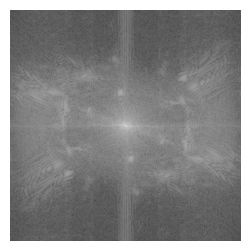

In [66]:
plt.figure(figsize=(3,3))
plt.imshow(img_e, cmap='gray')
plt.axis('off')
plt.show()

#f)Creating meshgrid for coordinate locations

In [67]:

print(img_a0.shape)
c_x = np.floor(img_a0.shape[0]/2)
c_y = np.floor(img_a0.shape[1]/2)
print((c_x,c_y))
[ii,jj] = np.meshgrid(range(img_a0.shape[0]), \
                      range(img_a0.shape[1]),indexing='ij')
print(ii)
print(jj)

(510, 510)
(255.0, 255.0)
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [507 507 507 ... 507 507 507]
 [508 508 508 ... 508 508 508]
 [509 509 509 ... 509 509 509]]
[[  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]
 ...
 [  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]
 [  0   1   2 ... 507 508 509]]


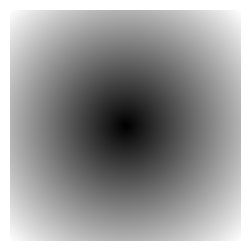

In [68]:
dist = np.sqrt(np.power(ii-c_x,2) + np.power(jj-c_y,2))
plt.figure(figsize=(3,3))
plt.imshow(dist, cmap='gray')
plt.axis('off')
plt.show()

#g) creating Ideal Low pass filter of radius 80

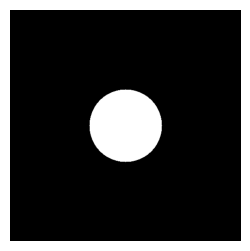

In [69]:
H_low = (dist <= 80)
plt.figure(figsize=(3,3))
plt.imshow(H_low, cmap='gray')
plt.axis('off')
plt.show()

#h)Apply low pass filter to a)

In [70]:
fft_low_shifted = img_d*H_low  # convolution spatial domain
fft_low = np.fft.ifftshift(fft_low_shifted)
img_low = np.fft.ifft2(fft_low)
print('Data_type is', img_low.dtype)
print('Image Size is {}'.format(img_low.shape))
print('Image min and max are ({}, {})'.format(img_low.min(),img_low.max()))

img_low = img_low.real
print('Data_type is', img_low.dtype)
print('Image Size is {}'.format(img_low.shape))
print('Image min and max are ({}, {})'.format(img_low.min(),img_low.max()))


Data_type is complex128
Image Size is (510, 510)
Image min and max are ((-7.386163875193283+2.3174451641763715e-15j), (264.5091861949885+5.419219767490233e-15j))
Data_type is float64
Image Size is (510, 510)
Image min and max are (-7.386163875193283, 264.5091861949885)


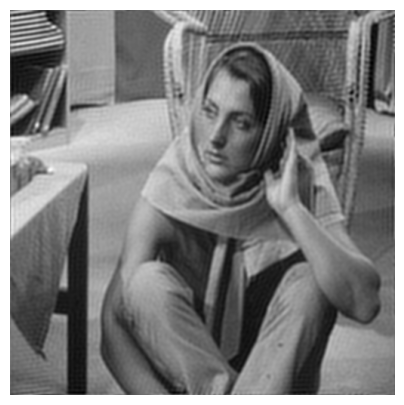

In [71]:
plt.figure(figsize=(5,5))
plt.imshow(img_low, cmap='gray')
plt.axis('off')
plt.show()

#Q1.a) load 'barbara_noisy02.jpg' and calculate its shifted DFT. Display it using log-transform [0 Marks]

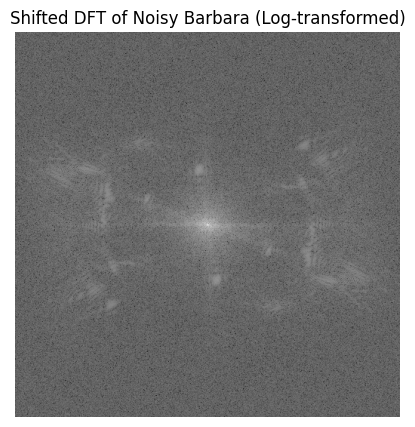

In [81]:
img_path = '/content/barbara_noisy02.jpg'
img_noisy = imageio.imread(img_path)
img_noisy = img_noisy.astype(np.float32)

noisy_fft = np.fft.fft2(img_noisy)
noisy_fft_shift = np.fft.fftshift(noisy_fft)


noisy_fft_shift_mag = np.abs(noisy_fft_shift)
noisy_fft_shift_log = np.log2(1 + noisy_fft_shift_mag)

min_val = noisy_fft_shift_log.min()
max_val = noisy_fft_shift_log.max()
noisy_fft_shift_log_norm = (noisy_fft_shift_log - min_val) / (max_val - min_val) * 255

plt.figure(figsize=(5, 5))
plt.imshow(noisy_fft_shift_log_norm, cmap='gray')
plt.title('Shifted DFT of Noisy Barbara (Log-transformed)')
plt.axis('off')
plt.show()


#Q1.b) Apply Ideal Low Pass Filter with radius 80 to Q1.a) image [0 Marks]

---



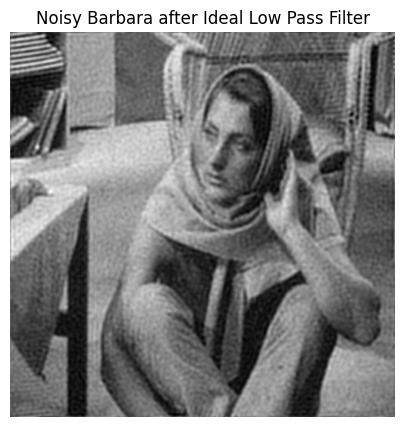

In [82]:

[ii, jj] = np.meshgrid(range(img_noisy.shape[0]), range(img_noisy.shape[1]), indexing='ij')
dist = np.sqrt(np.power(ii - c_x, 2) + np.power(jj - c_y, 2))

H_low = (dist <= 80)


noisy_fft_filtered = noisy_fft_shift * H_low

noisy_fft_inv_shift = np.fft.ifftshift(noisy_fft_filtered)
img_noisy_filtered = np.fft.ifft2(noisy_fft_inv_shift)


img_noisy_filtered = np.abs(img_noisy_filtered)

plt.figure(figsize=(5, 5))
plt.imshow(img_noisy_filtered, cmap='gray')
plt.title('Noisy Barbara after Ideal Low Pass Filter')
plt.axis('off')
plt.show()


#Q1.c) Apply Butterworth Lowpass Filter with $D_0=60$ to Q1.a) image by creating your own function  [2 Marks]

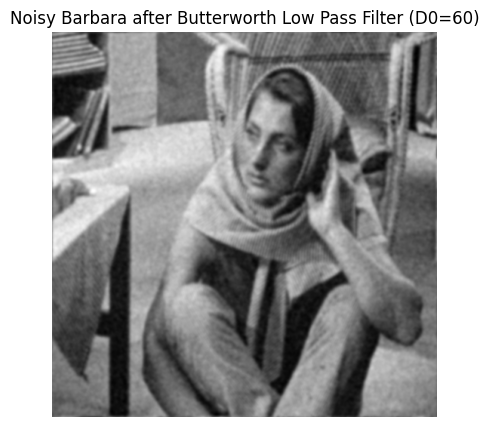

In [83]:

def butterworth_lowpass_filter(image, D0):

  rows, cols = image.shape[:2]
  c_x = rows // 2
  c_y = cols // 2
  ii, jj = np.meshgrid(range(rows), range(cols), indexing='ij')
  dist = np.sqrt(np.power(ii - c_x, 2) + np.power(jj - c_y, 2))
  n = 2
  H_butter = 1 / (1 + np.power(dist / D0, 2 * n))


  noisy_fft = np.fft.fft2(image)
  noisy_fft_shift = np.fft.fftshift(noisy_fft)
  filtered_fft = noisy_fft_shift * H_butter
  filtered_fft_inv_shift = np.fft.ifftshift(filtered_fft)
  filtered_img = np.fft.ifft2(filtered_fft_inv_shift)

  return np.abs(filtered_img)



D0 = 60
filtered_noisy_image = butterworth_lowpass_filter(img_noisy, D0)



plt.figure(figsize=(5, 5))
plt.imshow(filtered_noisy_image, cmap='gray')
plt.title(f'Noisy Barbara after Butterworth Low Pass Filter (D0={D0})')
plt.axis('off')
plt.show()


#Q1.d)Apply Gaussian Lowpass Filter with suitable $D_0$ to Q1.a) image such that RMSE with noiseless 'barbara.jpg' is lowest by creating your own function [4 Marks]

Best D0: 140, RMSE: 13.970698994539076


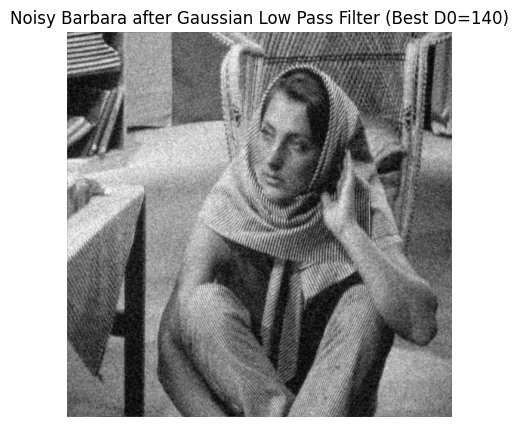

In [85]:

def gaussian_lowpass_filter(image, D0):

  rows, cols = image.shape[:2]
  c_x = rows // 2
  c_y = cols // 2
  ii, jj = np.meshgrid(range(rows), range(cols), indexing='ij')
  dist = np.sqrt(np.power(ii - c_x, 2) + np.power(jj - c_y, 2))
  H_gaussian = np.exp(-np.power(dist, 2) / (2 * np.power(D0, 2)))

  noisy_fft = np.fft.fft2(image)
  noisy_fft_shift = np.fft.fftshift(noisy_fft)
  filtered_fft = noisy_fft_shift * H_gaussian
  filtered_fft_inv_shift = np.fft.ifftshift(filtered_fft)
  filtered_img = np.fft.ifft2(filtered_fft_inv_shift)

  return np.abs(filtered_img)

def rmse(image1, image2):

    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions.")

    return np.sqrt(np.mean((image1 - image2) ** 2))

best_D0 = 0
min_rmse_val = float('inf')
D0_values = range(10, 200, 10)
for D0 in D0_values:
    filtered_image = gaussian_lowpass_filter(img_noisy, D0)
    rmse_val = rmse(filtered_image, img_a)
    if rmse_val < min_rmse_val:
        min_rmse_val = rmse_val
        best_D0 = D0

print(f"Best D0: {best_D0}, RMSE: {min_rmse_val}")


filtered_noisy_image_gaussian = gaussian_lowpass_filter(img_noisy, best_D0)



plt.figure(figsize=(5, 5))
plt.imshow(filtered_noisy_image_gaussian, cmap='gray')
plt.title(f'Noisy Barbara after Gaussian Low Pass Filter (Best D0={best_D0})')
plt.axis('off')
plt.show()


# Q2) Apply all three HighPass Filter to 'barbara_noisy02.jpg' with $D_0$ as 40,70,and 90 respectively by creating your own function and display the results [4 Marks\]

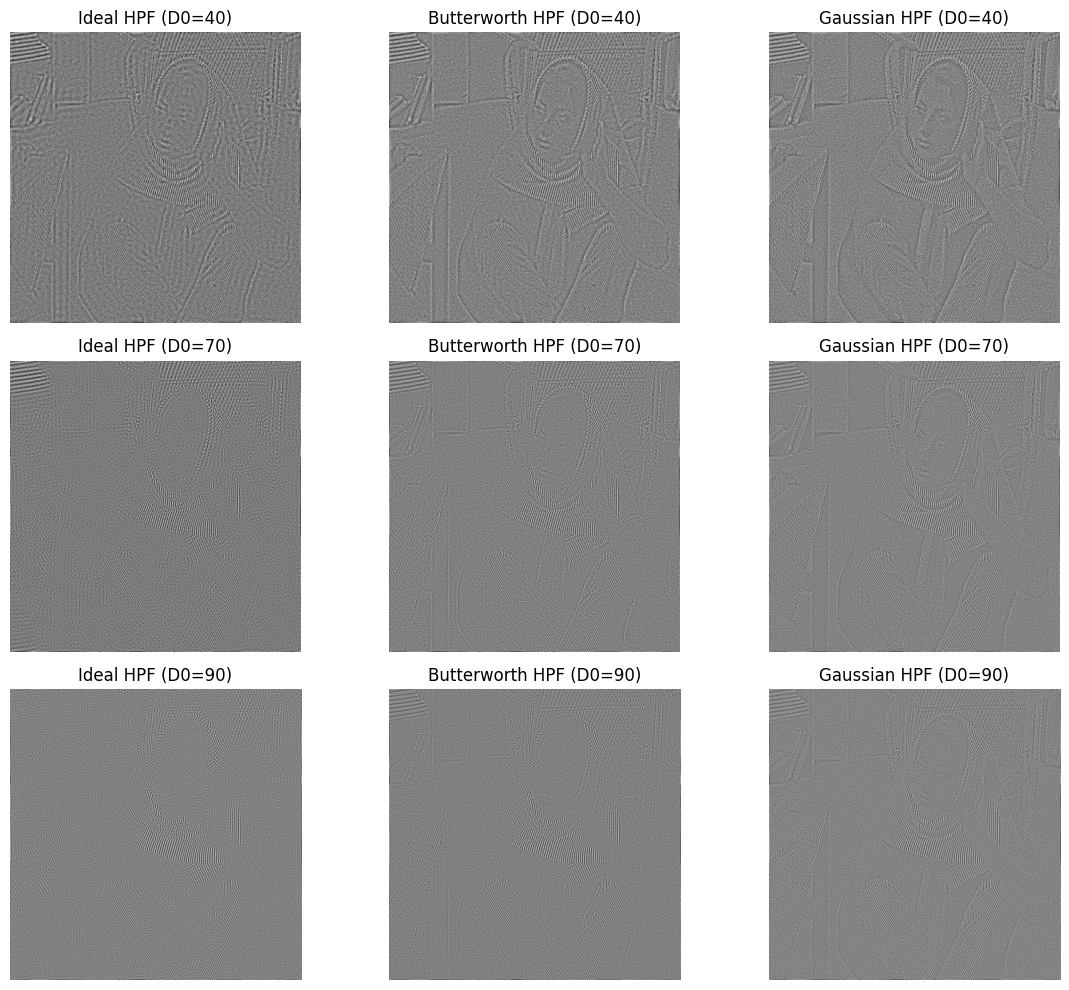

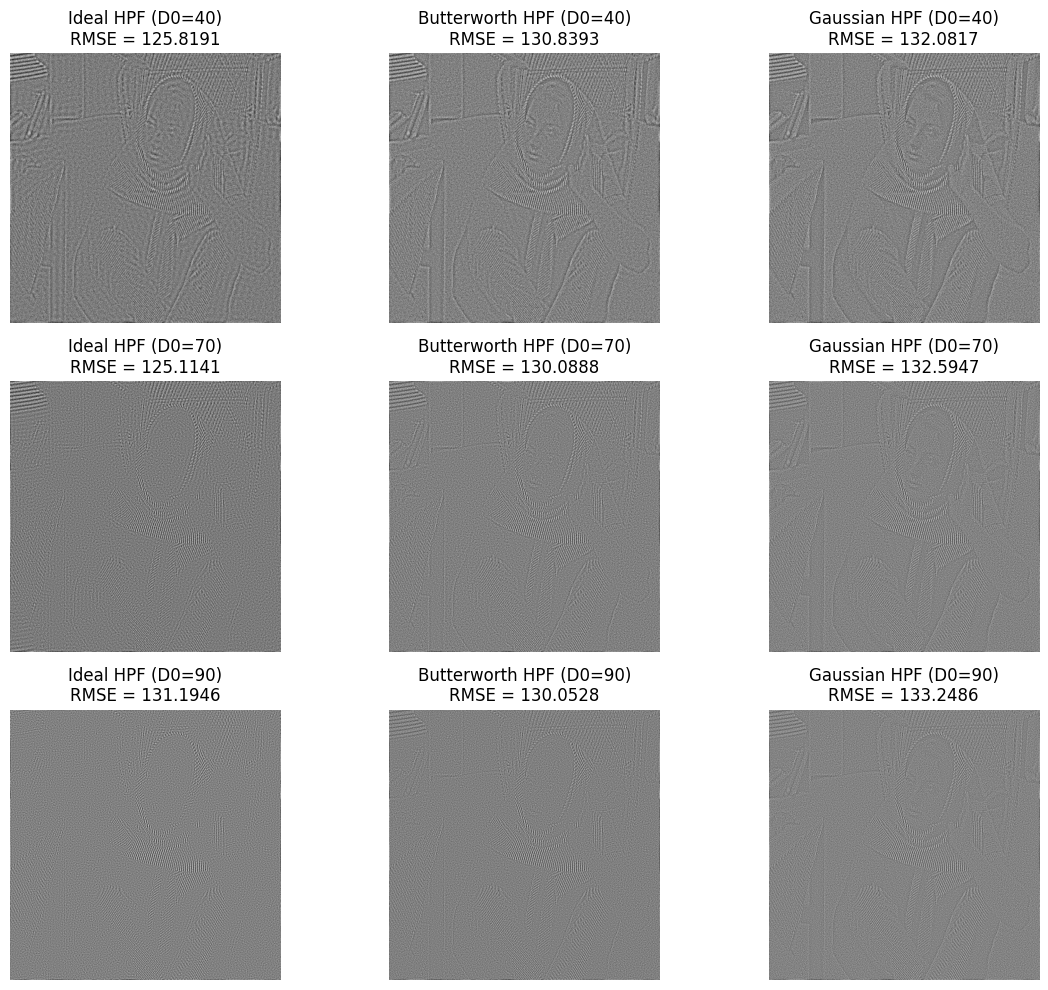

In [78]:

def ideal_highpass_filter(shape, D0):
    D0 = tf.cast(D0, tf.float32)
    c_x = tf.cast(shape[0] / 2, tf.float32)
    c_y = tf.cast(shape[1] / 2, tf.float32)

    ii, jj = tf.meshgrid(
        tf.cast(tf.range(shape[0]), tf.float32),
        tf.cast(tf.range(shape[1]), tf.float32),
        indexing='ij'
    )
    dist = tf.sqrt(tf.pow(ii - c_x, 2) + tf.pow(jj - c_y, 2))

    H = tf.cast(dist > D0, tf.complex64)
    return H


def butterworth_highpass_filter(shape, D0, n=2):
    D0 = tf.cast(D0, tf.float32)
    c_x = tf.cast(shape[0] / 2, tf.float32)
    c_y = tf.cast(shape[1] / 2, tf.float32)

    ii, jj = tf.meshgrid(
        tf.cast(tf.range(shape[0]), tf.float32),
        tf.cast(tf.range(shape[1]), tf.float32),
        indexing='ij'
    )
    dist = tf.sqrt(tf.pow(ii - c_x, 2) + tf.pow(jj - c_y, 2))

    H = 1 / (1 + tf.pow(D0 / (dist + 1e-5), 2 * n))
    return tf.cast(H, tf.complex64)


def gaussian_highpass_filter(shape, D0):
    D0 = tf.cast(D0, tf.float32)
    c_x = tf.cast(shape[0] / 2, tf.float32)
    c_y = tf.cast(shape[1] / 2, tf.float32)

    ii, jj = tf.meshgrid(
        tf.cast(tf.range(shape[0]), tf.float32),
        tf.cast(tf.range(shape[1]), tf.float32),
        indexing='ij'
    )
    dist = tf.sqrt(tf.pow(ii - c_x, 2) + tf.pow(jj - c_y, 2))

    H = 1 - tf.exp(-tf.pow(dist, 2) / (2.0 * tf.pow(D0, 2)))
    return tf.cast(H, tf.complex64)

def apply_highpass_filter(img, filter_fn, D0):
    img_fft = tf.signal.fft2d(tf.cast(img, tf.complex64))
    img_fft_shifted = tf.signal.fftshift(img_fft)

    H = filter_fn(tf.shape(img), D0)
    filtered_fft_shifted = img_fft_shifted * H

    filtered_fft = tf.signal.ifftshift(filtered_fft_shifted)
    img_filtered = tf.signal.ifft2d(filtered_fft)
    img_filtered = tf.math.real(img_filtered)

    min_val = tf.reduce_min(img_filtered)
    max_val = tf.reduce_max(img_filtered)
    img_display = 255.0 * (img_filtered - min_val) / (max_val - min_val)

    return img_display


img_path = '/content/barbara_noisy02.jpg'
img_noisy = tf.io.read_file(img_path)
img_noisy = tf.image.decode_image(img_noisy, channels=1, dtype=tf.float32)
img_noisy = tf.squeeze(img_noisy)

D0_values = [40, 70, 90]

plt.figure(figsize=(12, 10))

for i, D0 in enumerate(D0_values):

    img_ideal = apply_highpass_filter(img_noisy, ideal_highpass_filter, D0)
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(img_ideal.numpy(), cmap='gray')
    plt.axis('off')
    plt.title(f'Ideal HPF (D0={D0})')


    img_butterworth = apply_highpass_filter(img_noisy, butterworth_highpass_filter, D0)
    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(img_butterworth.numpy(), cmap='gray')
    plt.axis('off')
    plt.title(f'Butterworth HPF (D0={D0})')


    img_gaussian = apply_highpass_filter(img_noisy, gaussian_highpass_filter, D0)
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(img_gaussian.numpy(), cmap='gray')
    plt.axis('off')
    plt.title(f'Gaussian HPF (D0={D0})')

plt.tight_layout()
plt.show()

def ideal_highpass_filter(shape, D0):
    D0 = tf.cast(D0, tf.float32)
    c_x = tf.cast(shape[0] / 2, tf.float32)
    c_y = tf.cast(shape[1] / 2, tf.float32)

    ii, jj = tf.meshgrid(
        tf.cast(tf.range(shape[0]), tf.float32),
        tf.cast(tf.range(shape[1]), tf.float32),
        indexing='ij'
    )
    dist = tf.sqrt(tf.pow(ii - c_x, 2) + tf.pow(jj - c_y, 2))

    H = tf.cast(dist > D0, tf.complex64)
    return H


def butterworth_highpass_filter(shape, D0, n=2):
    D0 = tf.cast(D0, tf.float32)
    c_x = tf.cast(shape[0] / 2, tf.float32)
    c_y = tf.cast(shape[1] / 2, tf.float32)

    ii, jj = tf.meshgrid(
        tf.cast(tf.range(shape[0]), tf.float32),
        tf.cast(tf.range(shape[1]), tf.float32),
        indexing='ij'
    )
    dist = tf.sqrt(tf.pow(ii - c_x, 2) + tf.pow(jj - c_y, 2))

    H = 1 / (1 + tf.pow(D0 / (dist + 1e-5), 2 * n))
    return tf.cast(H, tf.complex64)

def gaussian_highpass_filter(shape, D0):
    D0 = tf.cast(D0, tf.float32)
    c_x = tf.cast(shape[0] / 2, tf.float32)
    c_y = tf.cast(shape[1] / 2, tf.float32)

    ii, jj = tf.meshgrid(
        tf.cast(tf.range(shape[0]), tf.float32),
        tf.cast(tf.range(shape[1]), tf.float32),
        indexing='ij'
    )
    dist = tf.sqrt(tf.pow(ii - c_x, 2) + tf.pow(jj - c_y, 2))

    H = 1 - tf.exp(-tf.pow(dist, 2) / (2.0 * tf.pow(D0, 2)))
    return tf.cast(H, tf.complex64)


def apply_highpass_filter(img, filter_fn, D0):
    img_fft = tf.signal.fft2d(tf.cast(img, tf.complex64))
    img_fft_shifted = tf.signal.fftshift(img_fft)

    H = filter_fn(tf.shape(img), D0)
    filtered_fft_shifted = img_fft_shifted * H

    filtered_fft = tf.signal.ifftshift(filtered_fft_shifted)
    img_filtered = tf.signal.ifft2d(filtered_fft)
    img_filtered = tf.math.real(img_filtered)


    min_val = tf.reduce_min(img_filtered)
    max_val = tf.reduce_max(img_filtered)
    img_display = 255.0 * (img_filtered - min_val) / (max_val - min_val)

    return img_display


def compute_rmse(img_filtered, img_clean):
    return tf.sqrt(tf.reduce_mean(tf.pow(img_filtered - img_clean, 2)))


img_noisy = tf.io.read_file('/content/barbara_noisy02.jpg')
img_noisy = tf.image.decode_image(img_noisy, channels=1, dtype=tf.float32)
img_noisy = tf.squeeze(img_noisy)


img_clean = tf.io.read_file('/content/barbara.jpg')
img_clean = tf.image.decode_image(img_clean, channels=1, dtype=tf.float32)
img_clean = tf.squeeze(img_clean)


D0_values = [40, 70, 90]


rmse_results = {}

plt.figure(figsize=(12, 10))

for i, D0 in enumerate(D0_values):

    img_ideal = apply_highpass_filter(img_noisy, ideal_highpass_filter, D0)
    rmse_ideal = compute_rmse(img_ideal, img_clean).numpy()
    rmse_results[f'Ideal (D0={D0})'] = rmse_ideal

    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(img_ideal.numpy(), cmap='gray')
    plt.axis('off')
    plt.title(f'Ideal HPF (D0={D0})\nRMSE = {rmse_ideal:.4f}')


    img_butterworth = apply_highpass_filter(img_noisy, butterworth_highpass_filter, D0)
    rmse_butterworth = compute_rmse(img_butterworth, img_clean).numpy()
    rmse_results[f'Butterworth (D0={D0})'] = rmse_butterworth

    plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(img_butterworth.numpy(), cmap='gray')
    plt.axis('off')
    plt.title(f'Butterworth HPF (D0={D0})\nRMSE = {rmse_butterworth:.4f}')


    img_gaussian = apply_highpass_filter(img_noisy, gaussian_highpass_filter, D0)
    rmse_gaussian = compute_rmse(img_gaussian, img_clean).numpy()
    rmse_results[f'Gaussian (D0={D0})'] = rmse_gaussian

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(img_gaussian.numpy(), cmap='gray')
    plt.axis('off')
    plt.title(f'Gaussian HPF (D0={D0})\nRMSE = {rmse_gaussian:.4f}')

plt.tight_layout()
plt.show()

